# Matplotlib Charts Cheat Sheet

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import squarify

In [3]:
file_path = r'B:\jupyter\Projects\Video Game Project\Video_Games.csv'
main_data = pd.read_csv(file_path)


In [4]:
# Define a custom function for concatenating unique non-null values
def concatenate_unique(series):
    non_null_values = series.dropna().unique()
    if len(non_null_values) > 1:
        return ', '.join(map(str, non_null_values))
    elif len(non_null_values) == 1:
        return non_null_values[0]
    else:
        return 'Unknown'

In [5]:
print("Data Overview:")
# Drop rows where all column values are null
main_data.dropna(how='all', inplace=True)
# Drop rows with exact duplicate values in all columns
main_data.drop_duplicates(inplace=True)
# Summary info about columns, data types, and null values
main_data.info()   

Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16928 entries, 0 to 16927
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0.3     16928 non-null  int64  
 1   Unnamed: 0.2     16928 non-null  int64  
 2   Unnamed: 0.1     16928 non-null  int64  
 3   Unnamed: 0       16928 non-null  int64  
 4   index            16928 non-null  int64  
 5   Name             16926 non-null  object 
 6   Platform         16928 non-null  object 
 7   Year_of_Release  16655 non-null  float64
 8   Genre            16926 non-null  object 
 9   Publisher        16873 non-null  object 
 10  NA_Sales         16928 non-null  float64
 11  EU_Sales         16928 non-null  float64
 12  JP_Sales         16928 non-null  float64
 13  Other_Sales      16928 non-null  float64
 14  Global_Sales     16928 non-null  float64
 15  Critic_Score     8260 non-null   float64
 16  Critic_Count     8260 non-null   float64
 1

In [6]:
#Convert User_Score into numeric, errors = 'coerce' converts non numeric values into NaN/null
main_data['User_Score'] = pd.to_numeric(main_data['User_Score'], errors='coerce',downcast='integer')
main_data['User_Score'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 16928 entries, 0 to 16927
Series name: User_Score
Non-Null Count  Dtype  
--------------  -----  
7718 non-null   float64
dtypes: float64(1)
memory usage: 132.4 KB


## Sales Analysis

In [7]:
# Group by 'Name' and sum the sales columns
aggregated_by_sales = main_data.agg({
    'NA_Sales': 'sum',
    'EU_Sales': 'sum',
    'JP_Sales': 'sum',
    'Other_Sales': 'sum',
})

aggregated_by_sales = pd.DataFrame(aggregated_by_sales)

# Reset index to convert index into a column
aggregated_by_sales.reset_index(inplace=True)

# Add column names
aggregated_by_sales.columns = ['Region', 'Sales']


#Sort by sales descending
aggregated_by_sales = aggregated_by_sales.sort_values(by='Sales', ascending=False)

# Add a new index column representing the ranking
aggregated_by_sales['Rank'] = range(1, len(aggregated_by_sales) + 1)

# Set the 'Rank' column as the index
aggregated_by_sales.set_index('Rank', inplace=True)

aggregated_by_sales.head()


,Region,Sales
Rank,,
1,NA_Sales,4509.45
2,EU_Sales,2485.88
3,JP_Sales,1323.27
4,Other_Sales,810.19


### Lollipop Chart

C:\Users\ignis\AppData\Local\Temp\ipykernel_12224\405351993.py:5: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  markerline, stemline, baseline = ax.stem(aggregated_by_sales['Region'], aggregated_by_sales['Sales'], basefmt=" ", linefmt="-", markerfmt="o", use_line_collection=True)


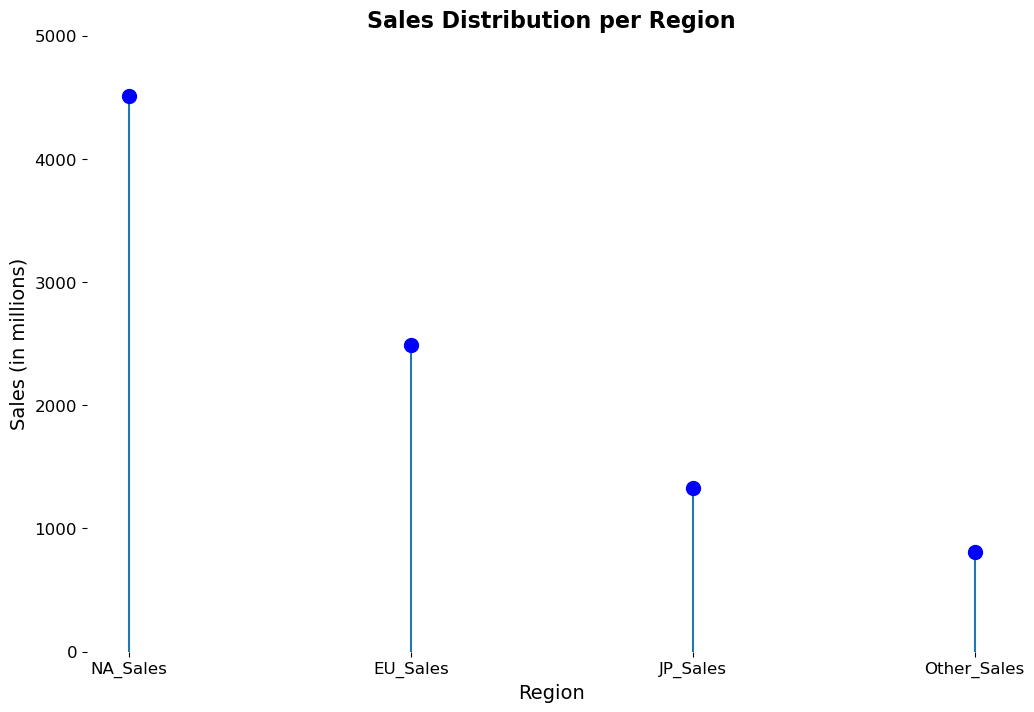

In [8]:
# Set figure size
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting lollipop chart with larger marker size
markerline, stemline, baseline = ax.stem(aggregated_by_sales['Region'], aggregated_by_sales['Sales'], basefmt=" ", linefmt="-", markerfmt="o", use_line_collection=True)




# Set marker properties
plt.setp(markerline, color='blue', markersize=10)




# Set maximum value for y-axis
ax.set_ylim(0, 5000)

# Add labels and title with adjusted font properties
ax.set_title('Sales Distribution per Region', fontsize=16, fontweight='bold')
ax.set_xlabel('Region', fontsize=14)
ax.set_ylabel('Sales (in millions)', fontsize=14)

# Set font size for tick labels
ax.tick_params(axis='both', labelsize=12)

# Set background color to transparent
plt.gca().patch.set_facecolor('none')

# Remove borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Show plot
plt.show()


### Treemap Chart

C:\Users\ignis\AppData\Local\Temp\ipykernel_12224\981932840.py:38: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(rect=[0, 1, 1, 1])


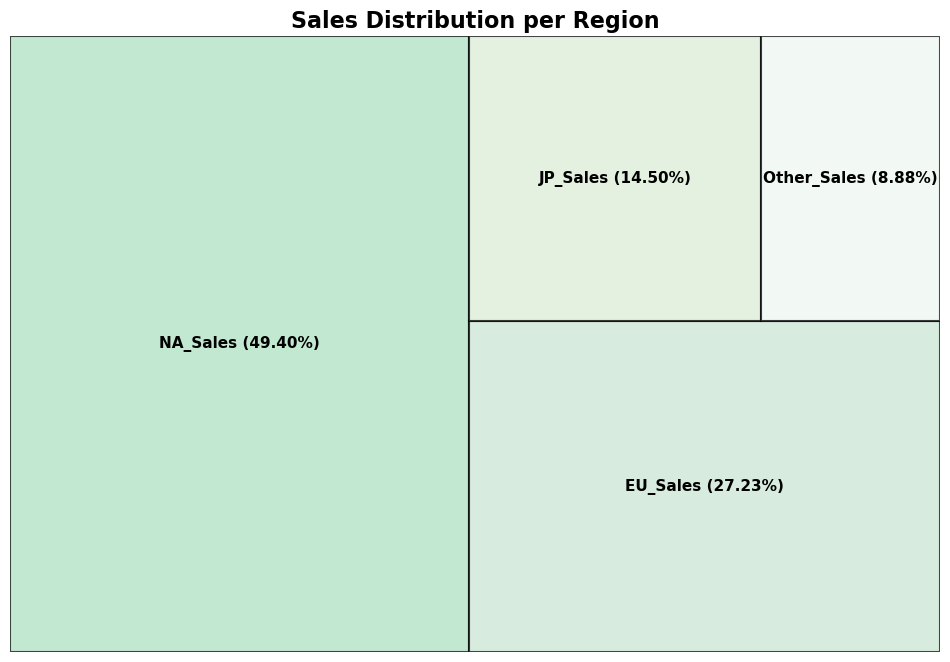

In [9]:
import matplotlib.pyplot as plt
import squarify

# Calculate total sales
total_sales = aggregated_by_sales['Sales'].sum()

# Calculate percentage contribution
aggregated_by_sales['Percentage'] = (aggregated_by_sales['Sales'] / total_sales) * 100

# Set figure size
plt.figure(figsize=(12, 8))

# Define pastel green color
pastel_green = "#a9dfbf"




# Plotting treemap chart with custom labels, adjusted color, edge color, and line width
squarify.plot(sizes=aggregated_by_sales['Sales'], 
              label=aggregated_by_sales.apply(lambda x: f"{x['Region']} ({x['Percentage']:.2f}%)", axis=1), 
              color=[pastel_green, "#c6e4d0", "#d9ead3", "#edf7f2"],  # Adjusted colors maintaining hue changes
              alpha=0.7,
              text_kwargs={'fontsize': 11, 'fontweight': 'bold'},  # Customize label font properties
              edgecolor='black',  # Set edge color
              linewidth=1.5)  # Set line width




# Add title
plt.title('Sales Distribution per Region', fontsize=16, fontweight='bold')

# Remove axis
plt.axis('off')

# Adjust layout to show edges on all sides
plt.tight_layout(rect=[0, 1, 1, 1])

# Save plot with a transparent background
plt.savefig('Sales Distribution per Region.png', transparent=True)

# Show plot
plt.show()


## Genre Analysis

In [10]:
# Group by 'Name' and sum the sales columns
aggregated_by_game_data = main_data.loc[(main_data['Year_of_Release'] >= 2000)].groupby('Name').agg({
    'NA_Sales': 'sum',
    'EU_Sales': 'sum',
    'JP_Sales': 'sum',
    'Other_Sales': 'sum',
    'Global_Sales': 'sum',
    'Critic_Score': 'mean',
    'Critic_Count': 'sum',
    'User_Score': 'mean',
    'User_Count': 'sum',
    'Platform': concatenate_unique,
    'Developer': lambda x: x.mode().iat[0] if not x.mode().empty else 'Unknown',  # Handling empty Series
    'Genre': lambda x: x.mode().iat[0] if not x.mode().empty else 'Unknown',  # Handling empty Series
    'Rating': lambda x: x.mode().iat[0] if not x.mode().empty else 'Unknown',  # Handling empty Series
    'Publisher': lambda x: x.mode().iat[0] if not x.mode().empty else 'Unknown'  # Handling empty Series
}).reset_index()

# Sort by global sales descending
aggregated_by_game_data = aggregated_by_game_data.sort_values(by='Global_Sales', ascending=False)

# Add a new index column representing the ranking
aggregated_by_game_data['Rank'] = range(1, len(aggregated_by_game_data) + 1)

# Set the 'Rank' column as the index
aggregated_by_game_data.set_index('Rank', inplace=True)

aggregated_by_game_data.head(500)


,Name,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Platform,Developer,Genre,Rating,Publisher
Rank,,,,,,,,,,,,,,,
1,Wii Sports,41.36,28.96,3.77,8.45,82.53,76.000000,51.0,8.000,322.0,Wii,Nintendo,Sports,E,Nintendo
2,Grand Theft Auto V,23.84,23.42,1.42,7.90,56.57,96.800000,245.0,8.080,15124.0,"PS3, X360, PS4, XOne, PC",Rockstar North,Action,M,Take-Two Interactive
3,Mario Kart Wii,15.68,12.76,3.79,3.29,35.52,82.000000,73.0,8.300,709.0,Wii,Nintendo,Racing,E,Nintendo
4,Wii Sports Resort,15.61,10.93,3.28,2.95,32.77,80.000000,73.0,8.000,192.0,Wii,Nintendo,Sports,E,Nintendo
5,Call of Duty: Modern Warfare 3,15.54,11.15,0.62,3.29,30.59,81.000000,162.0,2.725,20053.0,"X360, PS3, PC, Wii","Infinity Ward, Sledgehammer Games",Shooter,M,Activision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,Personal Trainer: Cooking,0.90,1.00,1.03,0.17,3.11,81.000000,12.0,7.800,10.0,DS,Indies Zero,Misc,E,Nintendo
497,The Legend of Zelda: A Link Between Worlds,1.40,1.01,0.46,0.23,3.10,91.000000,81.0,8.900,1057.0,3DS,Nintendo,Action,E,Nintendo
498,Rayman Origins,1.10,1.55,0.01,0.42,3.10,85.166667,184.0,8.000,1274.0,"PS3, X360, Wii, PSV, 3DS, PC",UBlart Montpellier,Platform,E10+,Ubisoft


In [11]:
# List of specific genres
specific_genres = ['Action', 'Shooter', 'Role-Playing', 'Sports', 'Misc', 'Racing', 
                   'Platform', 'Fighting', 'Simulation', 'Adventure', 'Strategy', 'Puzzle']

# Filter the dataframe to include only the specified genres
filtered_data = main_data.loc[(main_data['Year_of_Release'] >= 2000) & (main_data['Year_of_Release'] <= 2015) & 
                               (main_data['Genre'].isin(specific_genres))]

# Group by 'Genre' and 'Year_of_Release' and apply custom aggregation
aggregated_by_genre_data = filtered_data.groupby(['Genre', 'Year_of_Release']).agg({
    'Global_Sales': 'median'
}).reset_index()

aggregated_by_genre_data.head(25)


,Genre,Year_of_Release,Global_Sales
0,Action,2000.0,0.325
1,Action,2001.0,0.270
2,Action,2002.0,0.210
3,Action,2003.0,0.190
4,Action,2004.0,0.215
5,Action,2005.0,0.200
6,Action,2006.0,0.110
7,Action,2007.0,0.280
8,Action,2008.0,0.250
9,Action,2009.0,0.220


### Line Chart

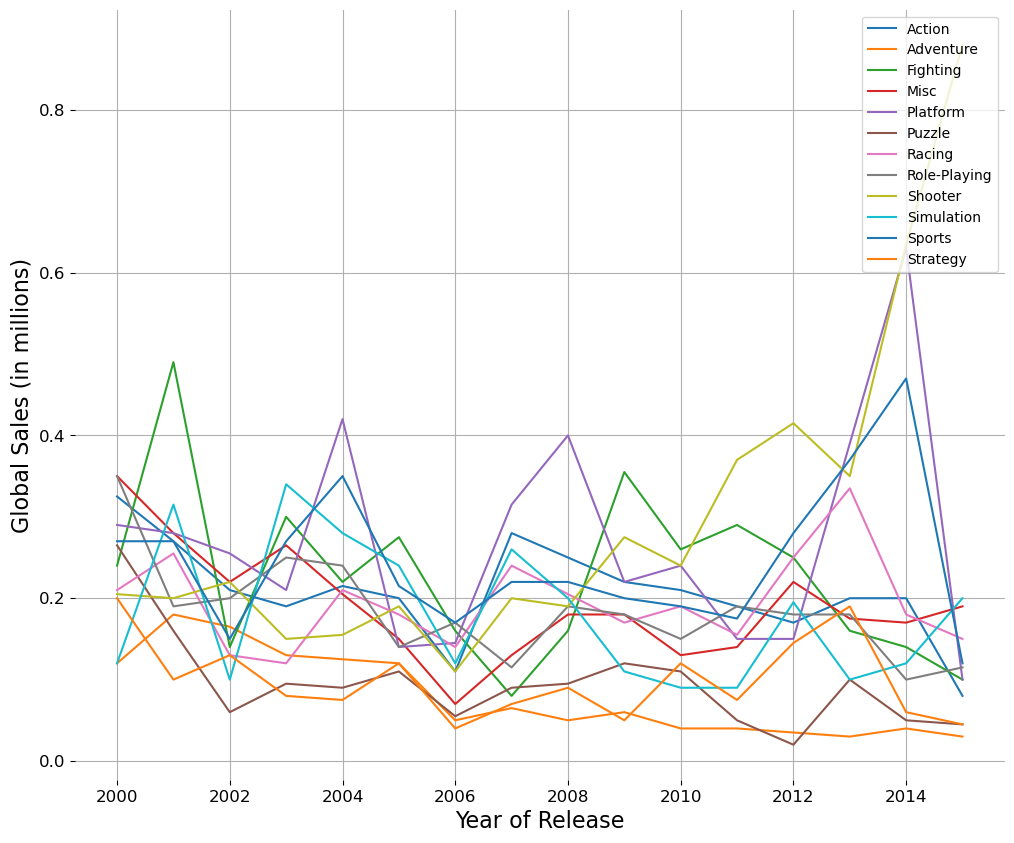

In [12]:
# Set figure size
fig, ax = plt.subplots(figsize=(12, 10))




# Plotting line chart for global sales trend of genres
for genre, data in aggregated_by_genre_data.groupby('Genre'):
    ax.plot(data['Year_of_Release'], data['Global_Sales'], label=genre)




# Set title and labels with adjusted font properties
#ax.set_title('Trend of Global Sales by Genre', fontsize=16, fontweight='bold')
ax.set_xlabel('Year of Release', fontsize=16)
ax.set_ylabel('Global Sales (in millions)', fontsize=16)

# Set font size for tick labels
ax.tick_params(axis='both', labelsize=12)

# Set background color to transparent
plt.gca().patch.set_facecolor('none')

# Remove borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Save plot with a transparent background
plt.savefig('Global_Sales_Trend.png', transparent=True)

# Show the plot
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


In [13]:
# Group by 'Genre' and apply custom aggregation
aggregated_by_genre_data = main_data.loc[main_data['Year_of_Release'] >= 2010].groupby('Genre').agg({
    'NA_Sales': 'sum',
    'EU_Sales': 'sum',
    'JP_Sales': 'sum',
    'Other_Sales': 'sum',
    'Global_Sales': 'sum',
    'Critic_Score': 'mean',
    'Critic_Count': 'sum',
    'User_Score': 'mean',
    'User_Count': 'sum',
    'Developer': concatenate_unique,
    'Rating': concatenate_unique,
    'Publisher': concatenate_unique,
    'Name': concatenate_unique,
}).reset_index()

# Sort by 'Global_Sales' in descending order
aggregated_by_genre_data = aggregated_by_genre_data.sort_values(by='Global_Sales', ascending=False)

# Add a new index column representing the ranking
aggregated_by_genre_data['Rank'] = range(1, len(aggregated_by_genre_data) + 1)

# Set the 'Rank' column as the index
aggregated_by_genre_data.set_index('Rank', inplace=True)

aggregated_by_genre_data.head(25)

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Publisher,Name
Rank,,,,,,,,,,,,,,
1,Action,293.93,235.96,72.84,77.27,680.38,68.920943,22228.0,6.776076,243253.0,"Rockstar North, Electronic Arts, Naughty Dog, ...","M, E, T, E10+, EC","Take-Two Interactive, Electronic Arts, Sony Co...","Grand Theft Auto V, FIFA Soccer 13, Uncharted ..."
2,Shooter,242.79,176.74,14.99,58.56,493.22,71.815287,12954.0,6.486228,227369.0,"Infinity Ward, Sledgehammer Games, Treyarch, I...","M, T, E10+, E","Activision, Microsoft Game Studios, Electronic...","Call of Duty: Modern Warfare 3, Call of Duty: ..."
3,Role-Playing,118.17,80.70,108.49,25.99,333.14,73.046693,9399.0,7.283955,166875.0,"Bethesda Game Studios, Blizzard Entertainment,...","M, T, E, E10+","Nintendo, Bethesda Softworks, Activision, Micr...","Pokemon Black/Pokemon White, Pokemon X/Pokemon..."
4,Sports,158.71,118.17,15.52,39.67,332.36,70.847584,6641.0,5.898750,28545.0,"EA Sports, EA Sports, EA Vancouver, Pipeworks ...","E, E10+, T","Electronic Arts, 505 Games, Microsoft Game Stu...","FIFA 16, FIFA 17, Zumba Fitness, FIFA 12, FIFA..."
5,Misc,130.93,69.55,24.93,21.48,247.04,69.310345,3377.0,6.649324,6220.0,"Good Science Studio, Ubisoft, Nd Cube, Nintend...","E, E10+, T, M, EC","Microsoft Game Studios, Ubisoft, Nintendo, Son...","Kinect Adventures!, Just Dance 3, Just Dance 2..."
6,Racing,49.51,57.25,7.96,15.70,130.48,70.812500,4615.0,6.393243,26059.0,"Retro Studios, Entertainment Analysis & Develo...","E, E10+, T, M","Nintendo, Sony Computer Entertainment, Microso...","Mario Kart 7, Gran Turismo 5, Mario Kart 8, Fo..."
7,Platform,55.10,38.63,15.82,10.81,120.33,74.432990,3603.0,7.073585,22924.0,"Nintendo, Nintendo EAD Tokyo, Retro Studios, M...","E, E10+, T","Nintendo, Sony Computer Entertainment, Disney ...","Super Mario 3D Land, New Super Mario Bros. 2, ..."
8,Fighting,40.04,20.74,14.20,8.50,83.41,69.904762,3993.0,6.967910,13327.0,"NetherRealm Studios, Warner Bros. Interactive ...","M, T, E10+","Nintendo, Warner Bros. Interactive Entertainme...","Super Smash Bros. for Wii U and 3DS, Mortal Ko..."
9,Simulation,27.56,26.69,13.30,5.74,73.31,64.629630,1785.0,6.131034,13423.0,"Nintendo, Maxis, The Sims Studio, Frontier Dev...","E, T, E10+, M","Nintendo, Electronic Arts, Microsoft Game Stud...","Animal Crossing: New Leaf, Tomodachi Life, Nin..."


### Horizontal Bar Chart

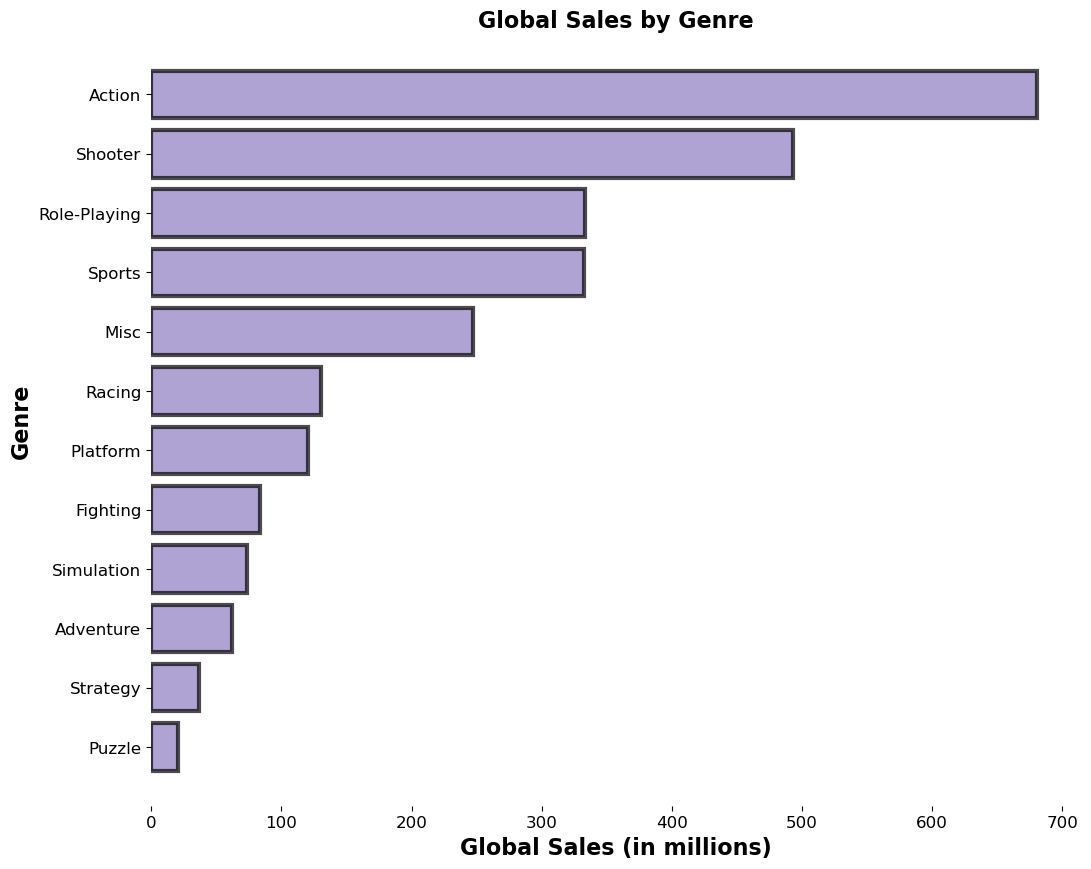

In [14]:
# Set figure size
fig, ax = plt.subplots(figsize=(12, 10))




# Plotting horizontal bar graph
ax.barh(aggregated_by_genre_data['Genre'], aggregated_by_genre_data['Global_Sales'], color='#8e7cc3', alpha=0.7, edgecolor='black', linewidth=3)




# Set title and labels with adjusted font properties
ax.set_title('Global Sales by Genre', fontsize=16, fontweight='bold')
ax.set_xlabel('Global Sales (in millions)', fontsize=16, fontweight='bold')  # Make x label bold
ax.set_ylabel('Genre', fontsize=16, fontweight='bold')  # Make y label bold

# Set font size for tick labels
ax.tick_params(axis='both', labelsize=12)

# Set background color to transparent
plt.gca().patch.set_facecolor('none')

# Remove borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Invert the y-axis to have the longest bar at the top and the lowest at the bottom
ax.invert_yaxis()

# Save plot with a transparent background
plt.savefig('Global_Sales.png', transparent=True)

# Show the plot
plt.show()


### Stacked Horizontal Bar Chart

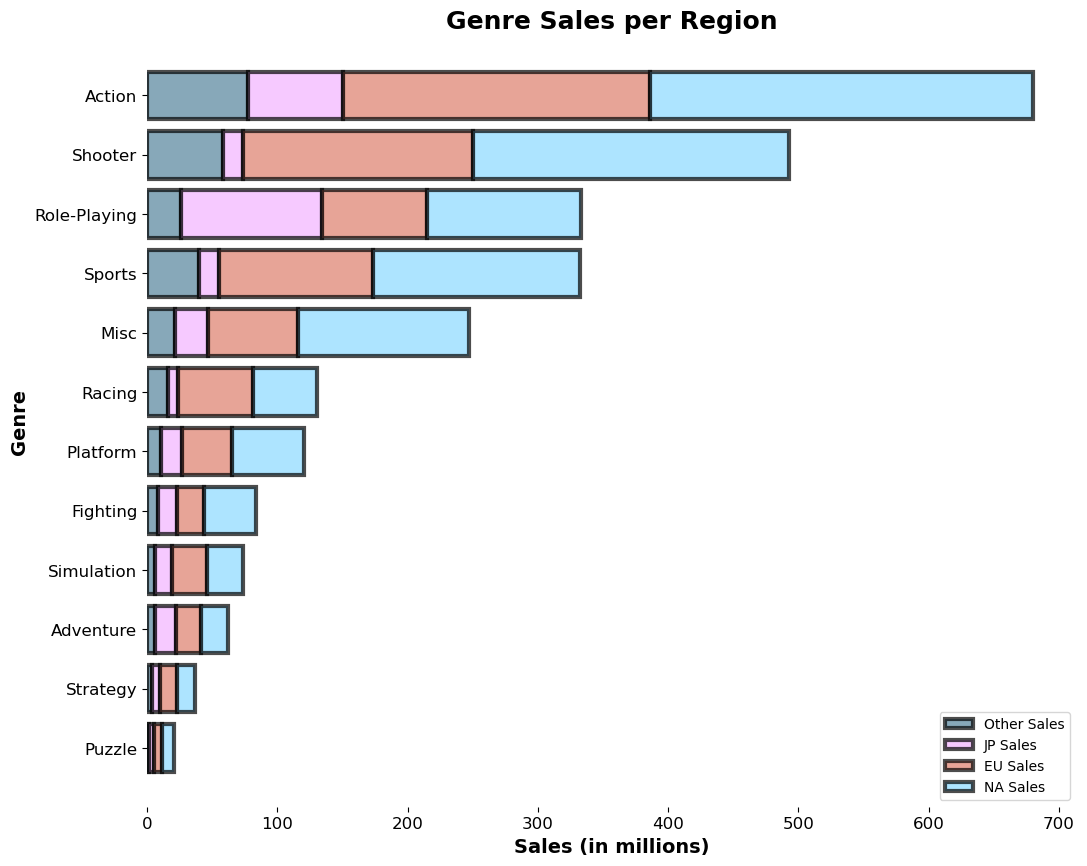

In [15]:
# Set figure size
fig, ax = plt.subplots(figsize=(12, 10))




# Plotting stacked horizontal bar graph for Other Sales
ax.barh(aggregated_by_genre_data['Genre'], aggregated_by_genre_data['Other_Sales'], color='#54849c', label='Other Sales', alpha=0.7, edgecolor='black', linewidth=3)

# Plotting stacked horizontal bar graph for JP Sales, on top of Other
ax.barh(aggregated_by_genre_data['Genre'], aggregated_by_genre_data['JP_Sales'], left=aggregated_by_genre_data['Other_Sales'], color='#f3b2ff', label='JP Sales', alpha=0.7, edgecolor='black', linewidth=3)

# Plotting stacked horizontal bar graph for EU Sales, On top of JP
ax.barh(aggregated_by_genre_data['Genre'], aggregated_by_genre_data['EU_Sales'], left=aggregated_by_genre_data['Other_Sales']+aggregated_by_genre_data['JP_Sales'], color='#dd7e6b', label='EU Sales', alpha=0.7, edgecolor='black', linewidth=3)

# Plotting stacked horizontal bar graph for NA Sales, on top of everyone
ax.barh(aggregated_by_genre_data['Genre'], aggregated_by_genre_data['NA_Sales'], left=aggregated_by_genre_data['Other_Sales']+aggregated_by_genre_data['JP_Sales']+aggregated_by_genre_data['EU_Sales'], color='#8ad9ff', label='NA Sales', alpha=0.7, edgecolor='black', linewidth=3)




# Set title and labels with adjusted font properties
ax.set_title('Genre Sales per Region', fontsize=18, fontweight='bold')
ax.set_xlabel('Sales (in millions)', fontsize=14,fontweight='bold')
ax.set_ylabel('Genre', fontsize=14,fontweight='bold')

# Set font size for tick labels
ax.tick_params(axis='both', labelsize=12)

# Add legend
ax.legend()

# Set background color to transparent
plt.gca().patch.set_facecolor('none')

# Remove borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Invert the y-axis to have the longest bar at the top and the lowest at the bottom
ax.invert_yaxis()

# Save plot with a transparent background
plt.savefig('Sales_by_Genre_and_Region.png', transparent=True)

# Show the plot
plt.show()


## Correlational Analysis

### Correlation Chart

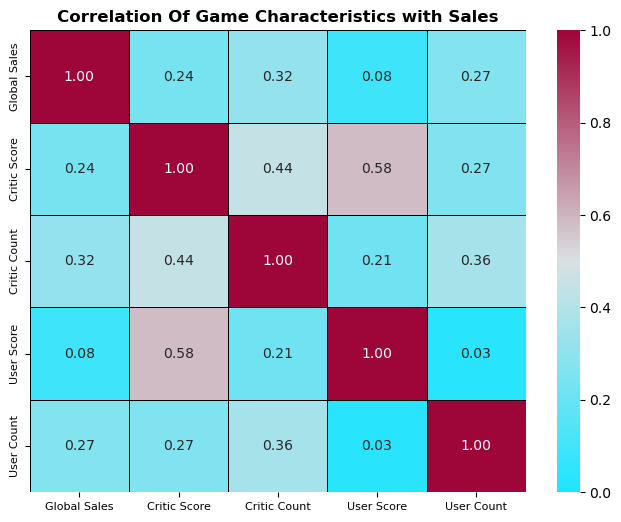

In [16]:
from matplotlib.colors import LinearSegmentedColormap
# Assign values to a new dataframe
correlationDataFrame = pd.DataFrame({
    'Global Sales': filtered_data['Global_Sales'],
    'Critic Score': filtered_data['Critic_Score'],
    'Critic Count': filtered_data['Critic_Count'],
    'User Score': filtered_data['User_Score'],
    'User Count': filtered_data['User_Count']
})

scoresDataFrameCorr = correlationDataFrame.corr()

# Create the heatmap with the specified color range
fig, ax = plt.subplots(figsize=(8, 6))
# Make custom colors
colors = [(0, '#1EE5FF'), (0.5, '#D9E1E2'), (1, '#9E0538')]
cmap = LinearSegmentedColormap.from_list('custom_colormap', colors)




sns.heatmap(scoresDataFrameCorr, annot=True, cmap=cmap, fmt=".2f", linewidths=0.5, vmin=0, vmax=1, ax=ax, linecolor='black') 




ax.set_title('Correlation Of Game Characteristics with Sales', fontweight='bold')  # Set title with bold font

# Adjust x and y tick label font sizes
ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', labelsize=8)

# Save plot with a transparent background
plt.savefig('Correlation_scores_sales.png', transparent=True)

# Show the plot
plt.show()

### Scatter Plot Chart

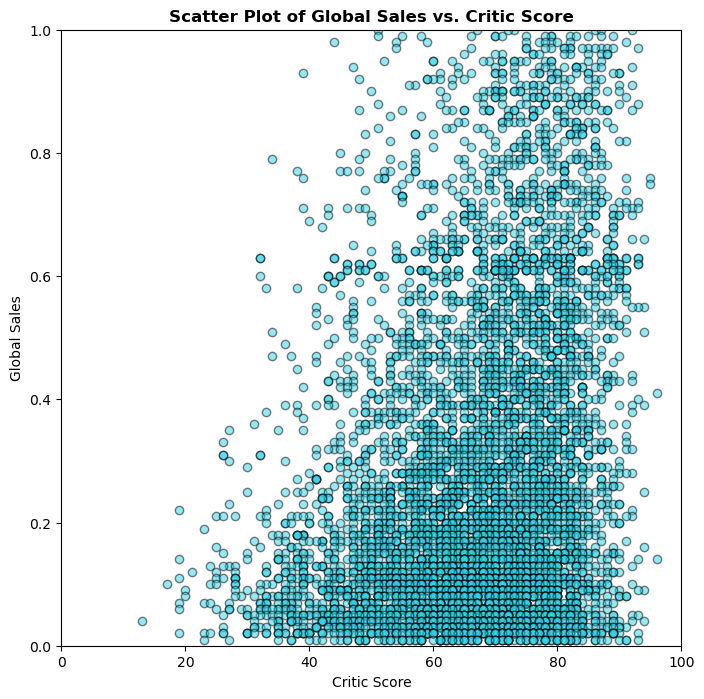

In [17]:
# Scatter plot with adjusted y-axis limits
plt.figure(figsize=(8, 8))




plt.scatter(filtered_data['Critic_Score'], filtered_data['Global_Sales'], alpha=0.5, color='#2FD3E8', edgecolors='black')




# Set y-axis limits
plt.ylim(0, 1)
plt.xlim(0, 100)
# Title and labels
plt.title('Scatter Plot of Global Sales vs. Critic Score', fontweight='bold')
plt.xlabel('Critic Score')
plt.ylabel('Global Sales')

# Save plot with a transparent background
plt.savefig('Critic_Score_scatter.png', transparent=True)

# Show the plot
plt.show()

### Multiple Histogram

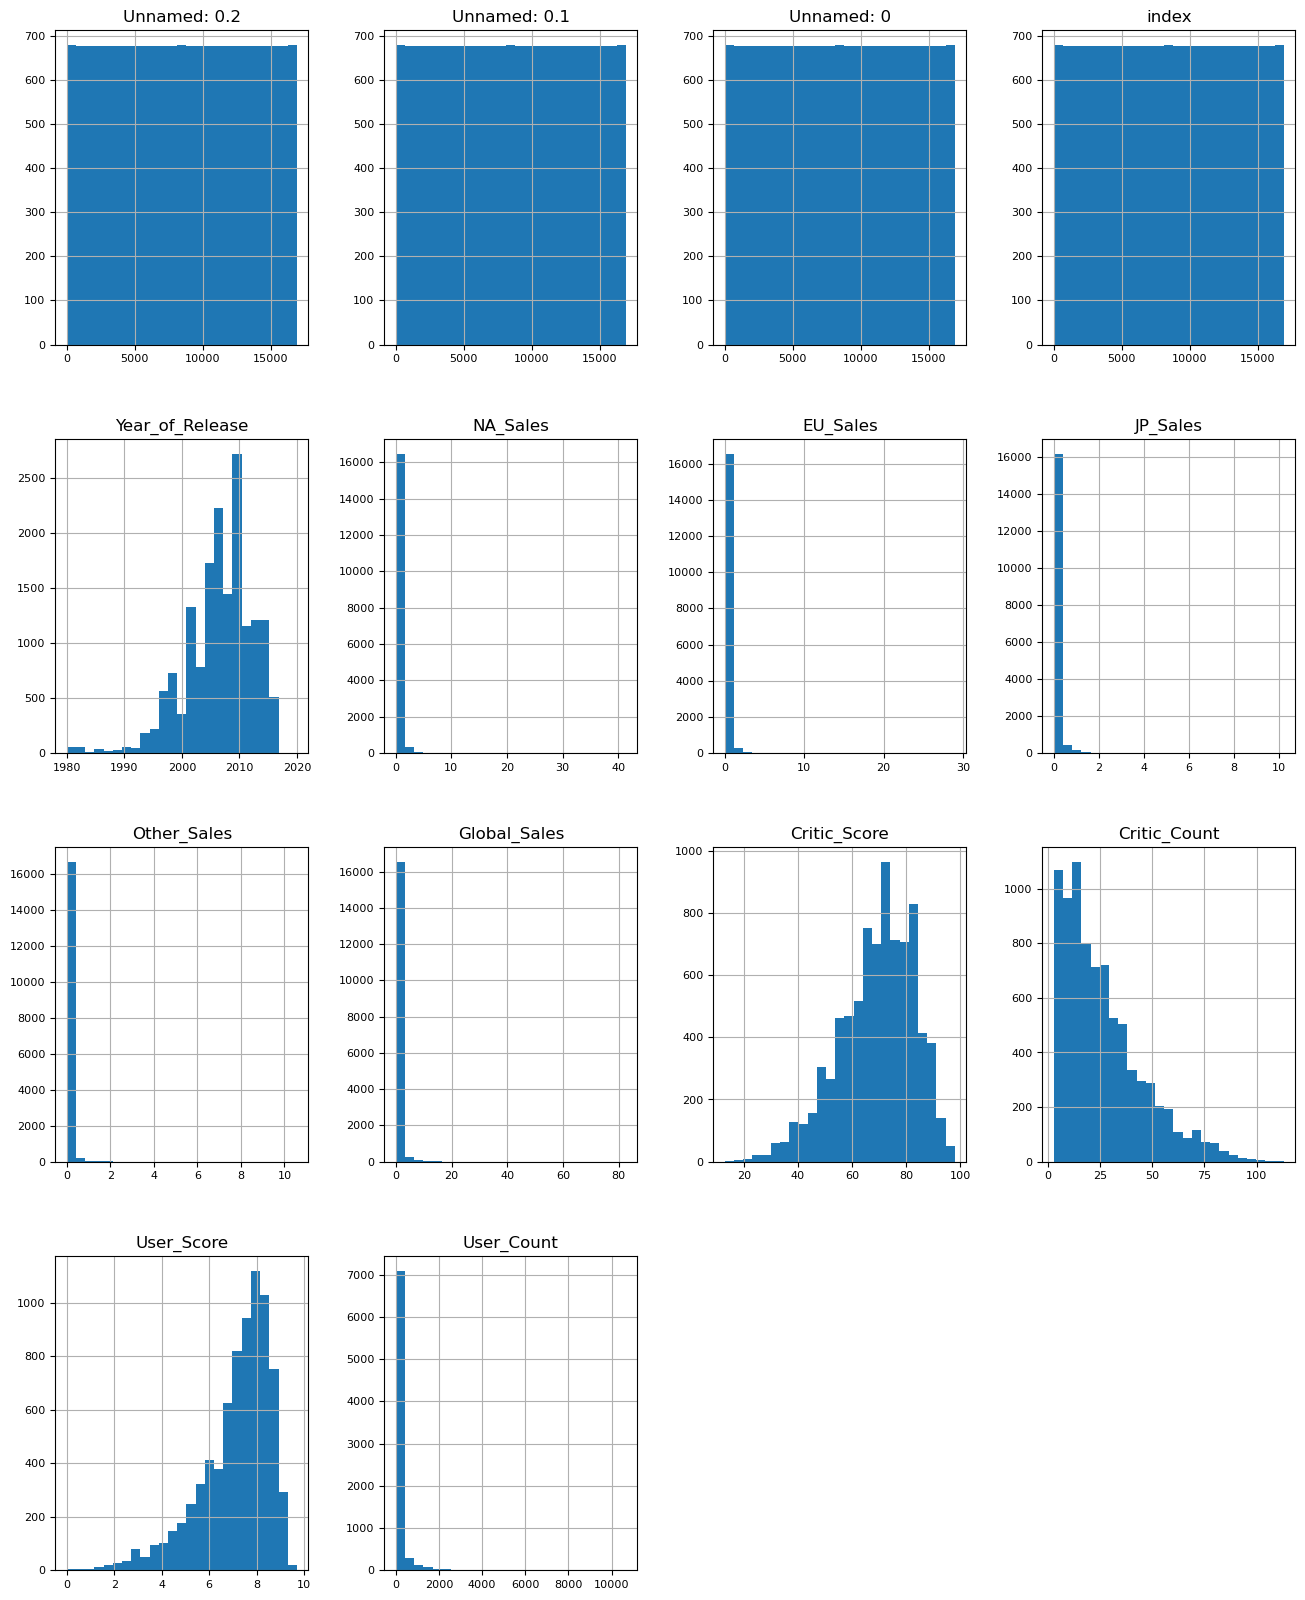

In [18]:
#Collate all numerical variables into one
numerical_data = main_data.select_dtypes(include = ['float64', 'int64'])
#Plot all the distributions into histograms



# Plot the histogram excluding the index column
numerical_data.drop(columns=numerical_data.columns[0]).hist(figsize=(16, 20), bins=25, xlabelsize=8, ylabelsize=8)




# Show the plot
plt.show()


### Multiple Box Plot


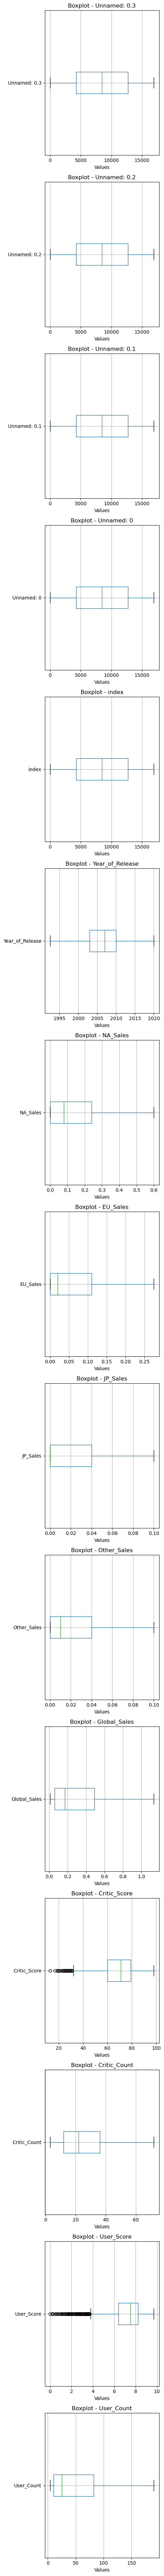

In [20]:
# Assuming numerical_data is your DataFrame containing numerical columns including "Critic_Score" and "User_Score"

# Exclude "Critic_Score" and "User_Score" from filtering
columns_to_filter = [col for col in numerical_data.columns if col not in ["Critic_Score", "User_Score","Year_Of_Release","index"]]

# Calculate the interquartile range (IQR) for each column excluding specified columns
Q1 = numerical_data[columns_to_filter].quantile(0.25)
Q3 = numerical_data[columns_to_filter].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds to filter outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Apply the bounds to filter out outliers excluding specified columns
filtered_data = numerical_data.copy()  # Create a copy of numerical_data
for col in columns_to_filter:
    filtered_data[col] = filtered_data[col].clip(lower=lower_bound[col], upper=upper_bound[col])
    
    
    
    
# Iterate through each column and create a boxplot in a separate row
fig, axes = plt.subplots(nrows=len(filtered_data.columns), ncols=1, figsize=(5, 5 * len(filtered_data.columns)))

for i, column in enumerate(filtered_data.columns):
    
    
    
    
    filtered_data.boxplot(column=column, ax=axes[i], vert=False)
    
    
    
    
    axes[i].set_title(f'Boxplot - {column}')
    axes[i].set_xlabel('Values')

plt.tight_layout()
plt.show()
